# Random Forest Regressor

In [2]:
#Import basic packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Import training dataset 
file = '//Users//chung-tsengwang//Desktop//Github Repo//Predicting-NBA-Rookie-Stats//data//processed//final.csv'
#file = 'C:\\Users\\Chung-Tseng Wang\\Desktop\\NBA-Rookie-Stat-Predictions\\data\\processed\\final.csv'
nba = pd.read_csv(file)
nba = nba[['year', 'Player','Position','G', 'GS', 'MP','FG', 'FGA',
       'FGP','2P','2PA', '2PP', '3P', '3PA', '3P%','FT', 'FTA', 'FTP','ORB', 'DRB','TRB','AST','STL','BLK'
        ,'TOV','PTS', 'SOS','PER','eFGP','WS','NBA_G','NBA_FGP','NBA_3PP','NBA_FTP','NBA_PTS','NBA_TRB','NBA_AST','NBA_STL','NBA_BLK','NBA_TOV']]
nba = nba.set_index(['Player','year'])
nba.head()

,,Position,G,GS,MP,FG,FGA,FGP,2P,2PA,2PP,...,NBA_G,NBA_FGP,NBA_3PP,NBA_FTP,NBA_PTS,NBA_TRB,NBA_AST,NBA_STL,NBA_BLK,NBA_TOV
Player,year,,,,,,,,,,,,,,,,,,,,,
Marshall Plumlee,2017,Center,124.0,36.0000,14.30000,1.3,1.9,0.665,1.2,1.9,0.664,...,29,0.515,0.283958,0.571,1.9,2.3,0.4,0.137931,0.172414,0.517241
Chris McCullough,2016,Forward,16.0,16.0000,28.10000,3.4,7.1,0.478,3.3,7.0,0.473,...,59,0.426,0.306000,0.548,3.3,1.9,0.3,0.508475,0.322034,0.338983
Drew Gordon,2015,Forward,61.0,53.0000,29.60000,5.3,10.0,0.535,5.3,10.0,0.534,...,9,0.421,0.000000,0.500,1.9,2.0,0.2,0.111111,0.000000,0.888889
Tyler Johnson,2015,Guard,5.0,69.2525,27.27375,0.2,0.6,0.333,0.0,0.4,0.000,...,270,0.433,0.364000,0.771,11.0,3.3,2.5,0.944444,0.474074,1.203704
Jeff Withey,2014,Center,117.0,76.0000,19.80000,2.8,4.9,0.568,2.8,4.9,0.567,...,206,0.525,0.143000,0.716,3.2,2.5,0.3,0.271845,0.757282,0.368932


In [5]:
nba.columns

Index(['Position', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP', '2P', '2PA', '2PP',
       '3P', '3PA', '3P%', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'PER', 'eFGP', 'WS', 'NBA_G',
       'NBA_FGP', 'NBA_3PP', 'NBA_FTP', 'NBA_PTS', 'NBA_TRB', 'NBA_AST',
       'NBA_STL', 'NBA_BLK', 'NBA_TOV'],
      dtype='object')

In [58]:
#Importing testing data 
file2 = '//Users//chung-tsengwang//Desktop//Github Repo//Predicting-NBA-Rookie-Stats//data//processed//college_2020_processed.csv'
rookies = pd.read_csv(file2)
rookies = rookies[['year', 'Player','Position','G', 'GS', 'MP','FG', 'FGA',
       'FGP','2P','2PA', '2PP', '3P', '3PA', '3P%','FT', 'FTA', 'FTP','ORB', 'DRB','TRB','AST','STL','BLK'
        ,'TOV','PTS', 'SOS','PER','eFGP','WS']]
rookies = rookies.set_index(['Player','year'])
rookies.head()

,,Position,G,GS,MP,FG,FGA,FGP,2P,2PA,2PP,...,TRB,AST,STL,BLK,TOV,PTS,SOS,PER,eFGP,WS
Player,year,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,2020,Forward,33,33.0,30.0,9.0,13.2,0.680,8.2,11.0,0.747,...,8.9,2.1,2.1,1.8,2.4,22.6,11.97,40.8,70.8,8.3
RJ Barrett,2020,Forward,38,38.0,35.3,8.4,18.5,0.454,6.5,12.2,0.529,...,7.6,4.3,0.9,0.4,3.2,22.6,11.97,23.3,50.6,6.5
De'Andre Hunter,2020,Guard,71,38.0,26.6,4.4,8.5,0.509,3.4,6.3,0.541,...,4.4,1.6,0.6,0.5,1.2,12.4,9.61,24.0,56.4,11.0
Darius Garland,2020,Guard,5,5.0,27.8,5.8,10.8,0.537,3.6,6.2,0.581,...,3.8,2.6,0.8,0.4,3.0,16.2,7.79,23.6,63.9,0.5
Jarrett Culver,2020,Guard,75,58.0,29.5,5.3,11.6,0.459,3.9,7.5,0.522,...,5.6,2.8,1.3,0.6,2.1,14.9,9.56,22.4,51.8,11.0


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
nba['Position'] = le.fit_transform(nba['Position'])
nba.head()

,,Position,G,GS,MP,FG,FGA,FGP,2P,2PA,2PP,...,NBA_G,NBA_FGP,NBA_3PP,NBA_FTP,NBA_PTS,NBA_TRB,NBA_AST,NBA_STL,NBA_BLK,NBA_TOV
Player,year,,,,,,,,,,,,,,,,,,,,,
Marshall Plumlee,2017,0,124.0,36.0000,14.30000,1.3,1.9,0.665,1.2,1.9,0.664,...,29,0.515,0.283958,0.571,1.9,2.3,0.4,0.137931,0.172414,0.517241
Chris McCullough,2016,1,16.0,16.0000,28.10000,3.4,7.1,0.478,3.3,7.0,0.473,...,59,0.426,0.306000,0.548,3.3,1.9,0.3,0.508475,0.322034,0.338983
Drew Gordon,2015,1,61.0,53.0000,29.60000,5.3,10.0,0.535,5.3,10.0,0.534,...,9,0.421,0.000000,0.500,1.9,2.0,0.2,0.111111,0.000000,0.888889
Tyler Johnson,2015,2,5.0,69.2525,27.27375,0.2,0.6,0.333,0.0,0.4,0.000,...,270,0.433,0.364000,0.771,11.0,3.3,2.5,0.944444,0.474074,1.203704
Jeff Withey,2014,0,117.0,76.0000,19.80000,2.8,4.9,0.568,2.8,4.9,0.567,...,206,0.525,0.143000,0.716,3.2,2.5,0.3,0.271845,0.757282,0.368932


In [59]:
le2 = preprocessing.LabelEncoder()
rookies['Position'] = le.fit_transform(rookies['Position'])
rookies.head()

,,Position,G,GS,MP,FG,FGA,FGP,2P,2PA,2PP,...,TRB,AST,STL,BLK,TOV,PTS,SOS,PER,eFGP,WS
Player,year,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,2020,1,33,33.0,30.0,9.0,13.2,0.680,8.2,11.0,0.747,...,8.9,2.1,2.1,1.8,2.4,22.6,11.97,40.8,70.8,8.3
RJ Barrett,2020,1,38,38.0,35.3,8.4,18.5,0.454,6.5,12.2,0.529,...,7.6,4.3,0.9,0.4,3.2,22.6,11.97,23.3,50.6,6.5
De'Andre Hunter,2020,3,71,38.0,26.6,4.4,8.5,0.509,3.4,6.3,0.541,...,4.4,1.6,0.6,0.5,1.2,12.4,9.61,24.0,56.4,11.0
Darius Garland,2020,3,5,5.0,27.8,5.8,10.8,0.537,3.6,6.2,0.581,...,3.8,2.6,0.8,0.4,3.0,16.2,7.79,23.6,63.9,0.5
Jarrett Culver,2020,3,75,58.0,29.5,5.3,11.6,0.459,3.9,7.5,0.522,...,5.6,2.8,1.3,0.6,2.1,14.9,9.56,22.4,51.8,11.0


In [79]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nba.ix[:,:28], nba['NBA_PTS'], test_size = 0.2, random_state = 21)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(712, 28)
(179, 28)
(179,)
(712,)


/Users/chung-tsengwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chung-tsengwang/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:979: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  obj = getattr(obj, self.name)._getitem_axis(key, axis=axis)


In [80]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train, y_train)
rf1_pred = rf.predict(X_test)

/Users/chung-tsengwang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [81]:
from sklearn.metrics import r2_score
from regressors import stats
r2_score(y_test, rf1_pred)

0.12711007825723053

### Model Evaluation Function

In [106]:
from sklearn.metrics import mean_squared_error
#Model Evaluation function
def adj_r2_score(r2, n, k):
    adj_r2 = 1-((1-r2)*((n-1)/(n-k-1)))
    return adj_r2

def mod_eval(model, X_test,X_train, y_test):
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print('Model Performance')
    print('R^2 of: ', r2)
    print('MSE of: ', mse)
    print('RMSE of: ', rmse)
    return 

## Tuning Hyperparameters with RandomizedSearch CV 

In [83]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
#Setting up parameters to test
n_estimators = [int(x) for x in np.linspace(500,3000,6)]
max_features = ['auto','sqrt','log2', None]
max_depth = [int(x) for x in np.linspace(1,10,10)]
max_depth.append(None)
min_samples_split = np.linspace(0.01, 0.2, 20)
min_samples_leaf = np.linspace(0.01, 0.2, 20)
bootstrap = [True, False]

#Create Random Grid 
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(grid)

{'n_estimators': [500, 1000, 1500, 2000, 2500, 3000], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]), 'min_samples_leaf': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]), 'bootstrap': [True, False]}


In [35]:
#Random Search of parameters using 3 fold CV search with 100 combinations
rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 100, cv = 3, verbose = 2, random_state = 12, n_jobs = 1)
rf_rs.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=0.08, min_samples_leaf=0.17, max_features=None, max_depth=None, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=0.08, min_samples_leaf=0.17, max_features=None, max_depth=None, bootstrap=False, total=   2.3s
[CV] n_estimators=1000, min_samples_split=0.08, min_samples_leaf=0.17, max_features=None, max_depth=None, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=0.08, min_samples_leaf=0.17, max_features=None, max_depth=None, bootstrap=False, total=   2.3s
[CV] n_estimators=1000, min_samples_split=0.08, min_samples_leaf=0.17, max_features=None, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=0.08, min_samples_leaf=0.17, max_features=None, max_depth=None, bootstrap=False, total=   2.1s
[CV] n_estimators=1000, min_samples_split=0.11, min_samples_leaf=0.17, max_features=log2, max_depth=5, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=0.11, min_samples_leaf=0.17, max_features=log2, max_depth=5, bootstrap=False, total=   0.9s
[CV] n_estimators=1000, min_samples_split=0.11, min_samples_leaf=0.17, max_features=log2, max_depth=5, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=0.11, min_samples_leaf=0.17, max_features=log2, max_depth=5, bootstrap=False, total=   1.0s
[CV] n_estimators=1000, min_samples_split=0.11, min_samples_leaf=0.17, max_features=log2, m

[CV]  n_estimators=2500, min_samples_split=0.01, min_samples_leaf=0.03, max_features=log2, max_depth=9, bootstrap=True, total=   2.6s
[CV] n_estimators=1000, min_samples_split=0.15000000000000002, min_samples_leaf=0.15000000000000002, max_features=None, max_depth=1, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=0.15000000000000002, min_samples_leaf=0.15000000000000002, max_features=None, max_depth=1, bootstrap=False, total=   1.2s
[CV] n_estimators=1000, min_samples_split=0.15000000000000002, min_samples_leaf=0.15000000000000002, max_features=None, max_depth=1, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=0.15000000000000002, min_samples_leaf=0.15000000000000002, max_features=None, max_depth=1, bootstrap=False, total=   1.2s
[CV] n_estimators=1000, min_samples_split=0.15000000000000002, min_samples_leaf=0.15000000000000002, max_features=None, max_depth=1, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=0.15000000000000002, min_samples_leaf=0.150

[CV]  n_estimators=2500, min_samples_split=0.19, min_samples_leaf=0.060000000000000005, max_features=None, max_depth=2, bootstrap=True, total=   3.7s
[CV] n_estimators=2500, min_samples_split=0.17, min_samples_leaf=0.04, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=2500, min_samples_split=0.17, min_samples_leaf=0.04, max_features=auto, max_depth=3, bootstrap=True, total=   4.3s
[CV] n_estimators=2500, min_samples_split=0.17, min_samples_leaf=0.04, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=2500, min_samples_split=0.17, min_samples_leaf=0.04, max_features=auto, max_depth=3, bootstrap=True, total=   4.4s
[CV] n_estimators=2500, min_samples_split=0.17, min_samples_leaf=0.04, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=2500, min_samples_split=0.17, min_samples_leaf=0.04, max_features=auto, max_depth=3, bootstrap=True, total=   4.3s
[CV] n_estimators=1000, min_samples_split=0.06999999999999999, min_samples_leaf=0.04, max_f

[CV]  n_estimators=2000, min_samples_split=0.06999999999999999, min_samples_leaf=0.060000000000000005, max_features=log2, max_depth=1, bootstrap=False, total=   1.9s
[CV] n_estimators=2000, min_samples_split=0.06999999999999999, min_samples_leaf=0.060000000000000005, max_features=log2, max_depth=1, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=0.06999999999999999, min_samples_leaf=0.060000000000000005, max_features=log2, max_depth=1, bootstrap=False, total=   2.2s
[CV] n_estimators=2000, min_samples_split=0.06999999999999999, min_samples_leaf=0.060000000000000005, max_features=log2, max_depth=1, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=0.06999999999999999, min_samples_leaf=0.060000000000000005, max_features=log2, max_depth=1, bootstrap=False, total=   1.7s
[CV] n_estimators=500, min_samples_split=0.04, min_samples_leaf=0.01, max_features=auto, max_depth=4, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=0.04, min_samples_leaf=0.01, max_feature

[CV]  n_estimators=1500, min_samples_split=0.14, min_samples_leaf=0.11, max_features=None, max_depth=10, bootstrap=True, total=   2.5s
[CV] n_estimators=1500, min_samples_split=0.14, min_samples_leaf=0.11, max_features=None, max_depth=10, bootstrap=True 
[CV]  n_estimators=1500, min_samples_split=0.14, min_samples_leaf=0.11, max_features=None, max_depth=10, bootstrap=True, total=   2.4s
[CV] n_estimators=1000, min_samples_split=0.04, min_samples_leaf=0.16, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=0.04, min_samples_leaf=0.16, max_features=auto, max_depth=3, bootstrap=True, total=   1.4s
[CV] n_estimators=1000, min_samples_split=0.04, min_samples_leaf=0.16, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=0.04, min_samples_leaf=0.16, max_features=auto, max_depth=3, bootstrap=True, total=   1.3s
[CV] n_estimators=1000, min_samples_split=0.04, min_samples_leaf=0.16, max_features=auto, max_depth=3, b

[CV]  n_estimators=2500, min_samples_split=0.09, min_samples_leaf=0.11, max_features=None, max_depth=10, bootstrap=False, total=  12.2s
[CV] n_estimators=2500, min_samples_split=0.09, min_samples_leaf=0.11, max_features=None, max_depth=10, bootstrap=False 
[CV]  n_estimators=2500, min_samples_split=0.09, min_samples_leaf=0.11, max_features=None, max_depth=10, bootstrap=False, total=   9.0s
[CV] n_estimators=2500, min_samples_split=0.09, min_samples_leaf=0.11, max_features=None, max_depth=10, bootstrap=False 
[CV]  n_estimators=2500, min_samples_split=0.09, min_samples_leaf=0.11, max_features=None, max_depth=10, bootstrap=False, total=   9.0s
[CV] n_estimators=2500, min_samples_split=0.11, min_samples_leaf=0.13, max_features=auto, max_depth=1, bootstrap=True 
[CV]  n_estimators=2500, min_samples_split=0.11, min_samples_leaf=0.13, max_features=auto, max_depth=1, bootstrap=True, total=   3.3s
[CV] n_estimators=2500, min_samples_split=0.11, min_samples_leaf=0.13, max_features=auto, max_dep

[CV]  n_estimators=2500, min_samples_split=0.14, min_samples_leaf=0.18000000000000002, max_features=sqrt, max_depth=7, bootstrap=True, total=   2.6s
[CV] n_estimators=1500, min_samples_split=0.03, min_samples_leaf=0.09999999999999999, max_features=auto, max_depth=9, bootstrap=False 
[CV]  n_estimators=1500, min_samples_split=0.03, min_samples_leaf=0.09999999999999999, max_features=auto, max_depth=9, bootstrap=False, total=   4.6s
[CV] n_estimators=1500, min_samples_split=0.03, min_samples_leaf=0.09999999999999999, max_features=auto, max_depth=9, bootstrap=False 
[CV]  n_estimators=1500, min_samples_split=0.03, min_samples_leaf=0.09999999999999999, max_features=auto, max_depth=9, bootstrap=False, total=   4.8s
[CV] n_estimators=1500, min_samples_split=0.03, min_samples_leaf=0.09999999999999999, max_features=auto, max_depth=9, bootstrap=False 
[CV]  n_estimators=1500, min_samples_split=0.03, min_samples_leaf=0.09999999999999999, max_features=auto, max_depth=9, bootstrap=False, total=   4

[CV]  n_estimators=3000, min_samples_split=0.2, min_samples_leaf=0.05, max_features=sqrt, max_depth=7, bootstrap=True, total=   3.7s
[CV] n_estimators=3000, min_samples_split=0.2, min_samples_leaf=0.05, max_features=sqrt, max_depth=7, bootstrap=True 
[CV]  n_estimators=3000, min_samples_split=0.2, min_samples_leaf=0.05, max_features=sqrt, max_depth=7, bootstrap=True, total=   4.8s
[CV] n_estimators=500, min_samples_split=0.11, min_samples_leaf=0.060000000000000005, max_features=log2, max_depth=2, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=0.11, min_samples_leaf=0.060000000000000005, max_features=log2, max_depth=2, bootstrap=True, total=   0.5s
[CV] n_estimators=500, min_samples_split=0.11, min_samples_leaf=0.060000000000000005, max_features=log2, max_depth=2, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=0.11, min_samples_leaf=0.060000000000000005, max_features=log2, max_depth=2, bootstrap=True, total=   0.5s
[CV] n_estimators=500, min_samples_split=0.11, min

[CV]  n_estimators=500, min_samples_split=0.13, min_samples_leaf=0.14, max_features=log2, max_depth=3, bootstrap=False, total=   0.6s
[CV] n_estimators=2000, min_samples_split=0.13, min_samples_leaf=0.05, max_features=auto, max_depth=4, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=0.13, min_samples_leaf=0.05, max_features=auto, max_depth=4, bootstrap=False, total=   9.4s
[CV] n_estimators=2000, min_samples_split=0.13, min_samples_leaf=0.05, max_features=auto, max_depth=4, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=0.13, min_samples_leaf=0.05, max_features=auto, max_depth=4, bootstrap=False, total=   6.3s
[CV] n_estimators=2000, min_samples_split=0.13, min_samples_leaf=0.05, max_features=auto, max_depth=4, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=0.13, min_samples_leaf=0.05, max_features=auto, max_depth=4, bootstrap=False, total=   6.3s
[CV] n_estimators=2500, min_samples_split=0.02, min_samples_leaf=0.08, max_features=log2, max_depth=7

[CV]  n_estimators=2500, min_samples_split=0.12, min_samples_leaf=0.01, max_features=None, max_depth=2, bootstrap=True, total=   5.3s
[CV] n_estimators=2500, min_samples_split=0.12, min_samples_leaf=0.01, max_features=None, max_depth=2, bootstrap=True 
[CV]  n_estimators=2500, min_samples_split=0.12, min_samples_leaf=0.01, max_features=None, max_depth=2, bootstrap=True, total=   4.4s
[CV] n_estimators=1500, min_samples_split=0.2, min_samples_leaf=0.15000000000000002, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=1500, min_samples_split=0.2, min_samples_leaf=0.15000000000000002, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.2s
[CV] n_estimators=1500, min_samples_split=0.2, min_samples_leaf=0.15000000000000002, max_features=sqrt, max_depth=1, bootstrap=True 
[CV]  n_estimators=1500, min_samples_split=0.2, min_samples_leaf=0.15000000000000002, max_features=sqrt, max_depth=1, bootstrap=True, total=   1.2s
[CV] n_estimators=1500, min_samples_split=0.2, min_

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 15.3min finished
/Users/chung-tsengwang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=0...


In [38]:
rf_rs.best_params_

{'n_estimators': 3000,
 'min_samples_split': 0.04,
 'min_samples_leaf': 0.01,
 'max_features': 'sqrt',
 'max_depth': 8,
 'bootstrap': False}

In [107]:
rf2 = RandomForestRegressor(n_estimators = 3000, min_samples_split = 0.04, min_samples_leaf = 0.01, max_features = 'sqrt', max_depth = 8, bootstrap = False)
rf2.fit(X_train, y_train)
rf2_pred = rf2.predict(X_test)
mod_eval(rf2, X_test, X_train, y_test)

Model Performance
R^2 of:  0.2280538914034348
MSE of:  17.31039698779416
RMSE of:  4.160576521083846


In [103]:
y_train2 = pd.DataFrame(y_train.copy(deep=True))
y_test2 = pd.DataFrame(y_test.copy(deep=True))
y_train2['pred'] =(rf2.predict(X_train))
y_test2['pred'] =(rf2.predict(X_test))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(y_train2.NBA_PTS, y_train2.pred)),X_train.shape[0], X_train.shape[1])))
print('train mse = ' + str(mean_squared_error(y_train2.NBA_PTS, y_train2.pred)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(y_test2.NBA_PTS, y_test2.pred)),X_train.shape[0], X_train.shape[1])))
print('test mse = ' + str(mean_squared_error(y_test2.NBA_PTS, y_test2.pred)))

adj train r^2 = 0.40340651385942117
train mse = 11.697322247796615
adj test r^2 = 0.19731601240597263
test mse = 17.290826303616925


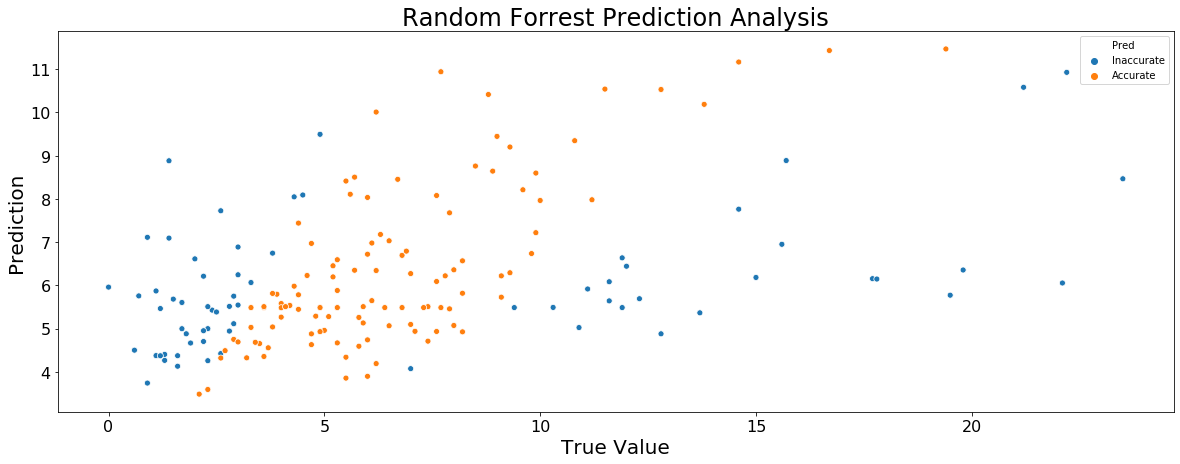

The model is relatively accurate for 62.01% of NBA Rookies.


In [108]:
#Using True/Prediction ratio to measure accuracy 
y_test2.loc[y_test2[['pred','NBA_PTS']].max(axis=1)/y_test2[['pred','NBA_PTS']].min(axis=1) >= 1.7, 'Pred'] = 'Inaccurate'
y_test2.loc[y_test2[['pred','NBA_PTS']].max(axis=1)/y_test2[['pred','NBA_PTS']].min(axis=1) < 1.7, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(20, 7))
ax = sns.scatterplot(x="NBA_PTS", y="pred", hue="Pred", data=y_test2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("The model is relatively accurate for " + str(round(100*len(y_test2[y_test2['Pred'] == 'Accurate'])/len(y_test2),2)) + "% of NBA Rookies.")

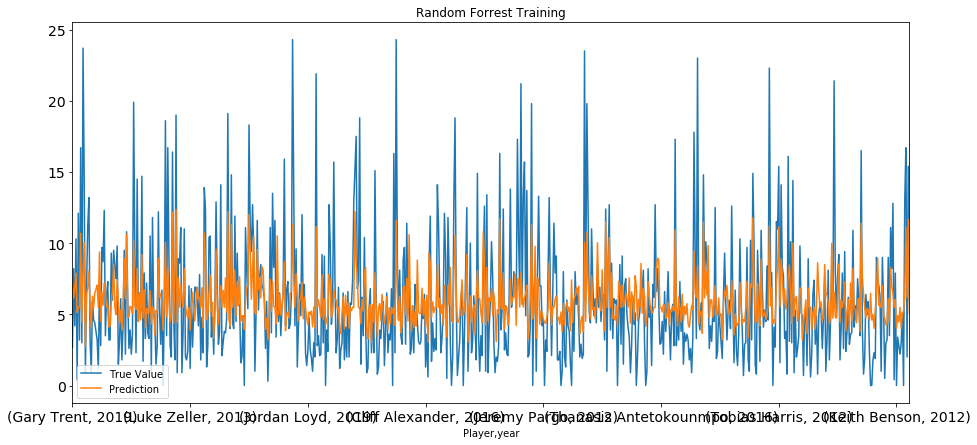

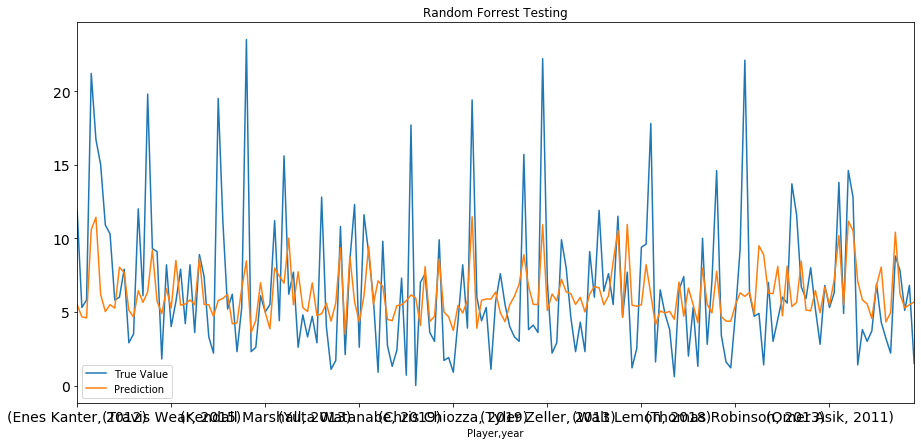

In [111]:
y_train2['NBA_PTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
y_train2['pred'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
y_test2['NBA_PTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
y_test2['pred'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()

Large part of the data was imputed with the mean of the column causing model to be severaly underfitting. Which in turn explains the low R^2 and high MSE. 

In [127]:
rookies['NBA_PTS'] = rf2.predict(rookies.iloc[:,:28])
rookies.sort_values('NBA_PTS')

,,Position,G,GS,MP,FG,FGA,FGP,2P,2PA,2PP,...,AST,STL,BLK,TOV,PTS,SOS,PER,eFGP,WS,NBA_PTS
Player,year,,,,,,,,,,,,,,,,,,,,,
Matisse Thybulle,2020,4,135,134.0,29.4,3.3,7.6,0.429,1.9,3.7,0.507,...,2.0,2.5,1.4,1.9,9.2,7.000000,16.500000,52.2,11.1,4.176861
Jaylen Hands,2020,3,64,48.0,28.3,4.1,9.9,0.409,2.4,5.4,0.440,...,4.4,1.2,0.2,2.5,12.1,6.820000,17.100000,49.5,5.0,4.606047
Justin James,2020,1,93,19.0,13.9,1.9,4.7,0.402,1.4,3.2,0.433,...,0.6,0.8,0.5,1.3,4.8,-8.160000,2.100000,45.5,2.1,4.708536
Jordan Bone,2020,3,95,87.0,26.1,3.6,8.4,0.424,2.6,5.7,0.458,...,4.3,0.7,0.1,1.6,9.7,10.150000,16.000000,48.1,8.0,4.755873
Admiral Schofield,2020,4,132,95.0,24.9,4.4,9.7,0.458,3.0,6.1,0.501,...,1.3,0.7,0.4,1.4,11.9,9.580000,18.800000,53.0,12.2,4.905945
Cameron Johnson,2020,1,118,79.0,19.9,3.7,8.0,0.464,3.7,8.0,0.465,...,0.7,0.9,0.5,2.0,10.1,-4.620000,16.803262,46.5,6.4,4.973969
Ty Jerome,2020,3,105,76.0,26.4,3.5,8.0,0.435,1.9,3.9,0.479,...,3.7,1.2,0.0,1.4,9.6,10.050000,19.700000,53.4,13.7,4.995761
Talen Horton-Tucker,2020,3,35,34.0,27.2,4.4,10.9,0.406,3.0,6.4,0.475,...,2.3,1.3,0.7,1.7,11.8,9.300000,17.200000,47.0,2.7,5.013871
Isaiah Roby,2020,1,97,52.0,23.9,2.9,6.1,0.476,2.4,4.6,0.523,...,1.5,0.8,1.6,1.6,8.1,9.790000,18.600000,51.8,7.8,5.054443
